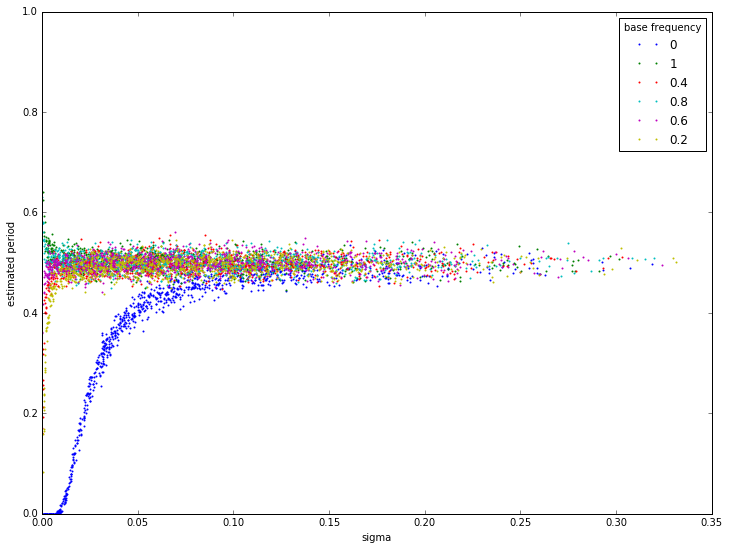

In [12]:
import matplotlib.pyplot as plt
import numpy as np
from collections import defaultdict
%matplotlib inline

fig_size = [12, 9]
plt.rcParams["figure.figsize"] = fig_size

# http://www.math.ku.dk/~susanne/StatDiff/Overheads1b

sign = lambda x: x
steps = 1000
data = defaultdict(list)
for m in range(1000):
    for base_frequency in [0, .2, .4, .6, .8, 1]:
        amplitude = 1
        sigma = np.abs(np.random.randn(1) * .10)
        frequency = base_frequency + sigma * np.random.randn(steps)
        phase = 1
        time = np.arange(0, steps)

        pure_data = np.sign(np.cos(np.pi * base_frequency ** 2.0 * time + 2 * np.pi * phase))
        exploring_data = np.sign(np.cos(np.pi * frequency ** 2.0 * time + 2 * np.pi * phase))

        pure_half_period = np.mean(np.diff(pure_data, 1) != 0)
        explore_half_period = np.mean(np.diff(exploring_data, 1) != 0)
        magnitude = (explore_half_period + 1) / (pure_half_period + 1)

        data[base_frequency].append((sigma, explore_half_period))

for base_frequency in data.keys():
    xs, ys = zip(*data[base_frequency])
    plt.plot(xs, ys, 'o', markersize=2, markeredgewidth=0, label=base_frequency)

plt.ylabel('estimated period')
plt.xlabel('sigma')
plt.legend(title='base frequency')
plt.show()

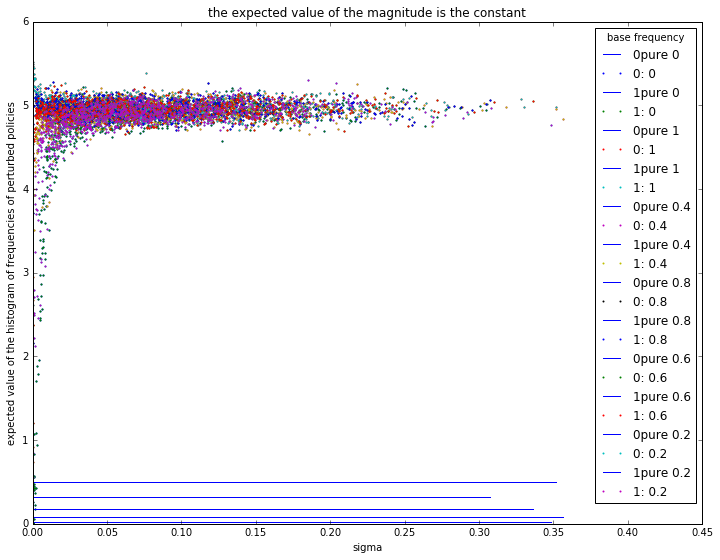

In [13]:
data = defaultdict(lambda: defaultdict(list))
for base_frequency in [0, .2, .4, .6, .8, 1]:
    for m in range(1000):
        time = np.arange(0, steps)
        sigma = np.abs(np.random.randn(1) * .10)
        frequency_1 = base_frequency + np.random.randn(steps)
        frequency_2 = base_frequency + np.cumsum(sigma * np.random.randn(steps))

        for model, frequency in enumerate([frequency_1, frequency_2]):
            pure_data = sign(np.cos(np.pi * base_frequency ** 2.0 * time))
            perturbed_data = sign(np.cos(np.pi * frequency_2 ** 2.0 * time))
            frequencies = np.abs(np.fft.fftfreq(steps))

            pure_data_magnitude = np.abs(np.fft.fft(pure_data))
            perturbed_data_magnitude = np.abs(np.fft.fft(perturbed_data))

            pure_data_expected_value_of_magnitude = np.mean(pure_data_magnitude * frequencies)
            perturbed_data_expected_value_of_magnitude = np.mean(perturbed_data_magnitude * frequencies)

            data[base_frequency][model].append((sigma, perturbed_data_expected_value_of_magnitude, pure_data_expected_value_of_magnitude))

for base_frequency in data.keys():
    for model in data[base_frequency].keys():
        xs, ys, pdm = zip(*data[base_frequency][model])
        plt.plot(xs, pdm, 'b-', label=str(model) + "pure " + str(base_frequency))
        plt.plot(xs, ys, 'o', markersize=2, markeredgewidth=0, label=str(model) + ": " + str(base_frequency))

plt.ylabel('expected value of the histogram of frequencies of perturbed policies')
plt.xlabel('sigma')
plt.title('the expected value of the magnitude is the constant')
plt.legend(title='base frequency')
plt.show()

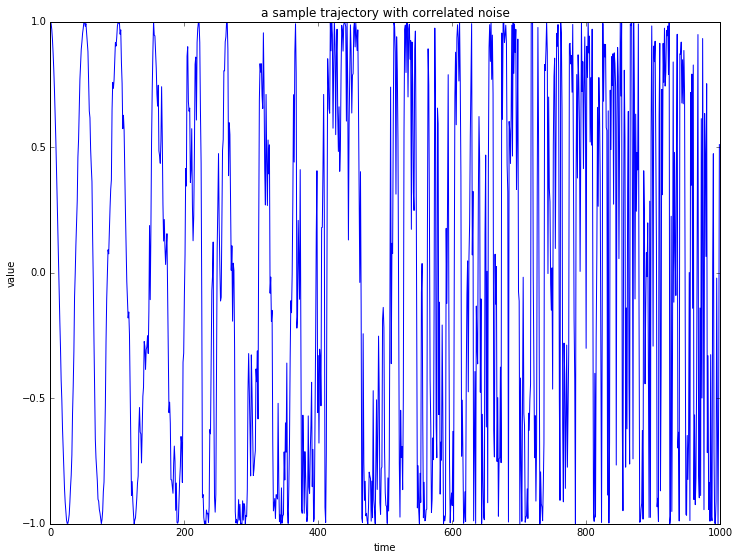

In [7]:
base_frequency = 0.2
sigma = 0.001

plt.ylabel('value')
plt.xlabel('time')
plt.title('a sample trajectory with correlated noise')
plt.plot(sign(np.cos(np.pi * (base_frequency + np.cumsum(sigma * np.random.randn(steps))) ** 2.0 * np.arange(0, steps))))
plt.show()

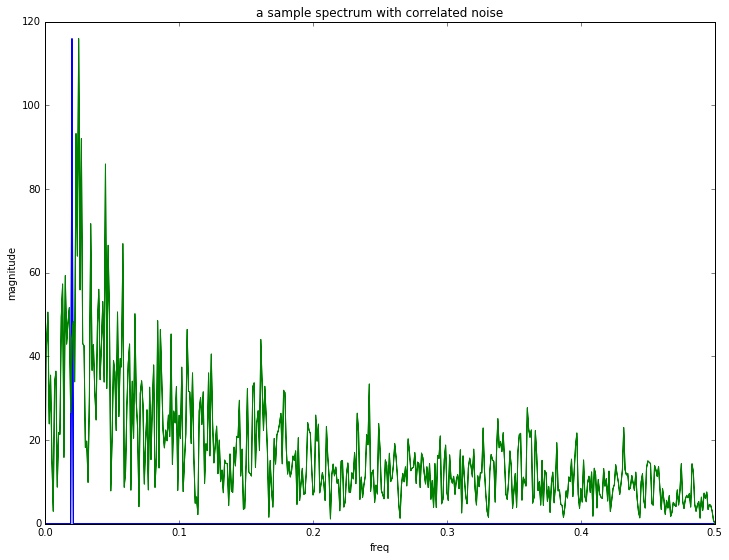

In [8]:
plt.ylabel('magnitude')
plt.xlabel('freq')
plt.title('a sample spectrum with correlated noise')
frequencies = np.abs(np.fft.fftfreq(steps))
data = sign(np.cos(np.pi * (base_frequency + np.cumsum(sigma * np.random.randn(steps))) ** 2.0 * np.arange(0, steps)))
magnitude = np.abs(np.fft.fft(data))
data = sign(np.cos(np.pi * (base_frequency) ** 2.0 * np.arange(0, steps)))
magnitude2 = (np.abs(np.fft.fft(data)) / np.max(np.abs(np.fft.fft(data)))) * np.max(magnitude)
plt.plot(frequencies, magnitude2)
plt.plot(frequencies, magnitude)
plt.show()

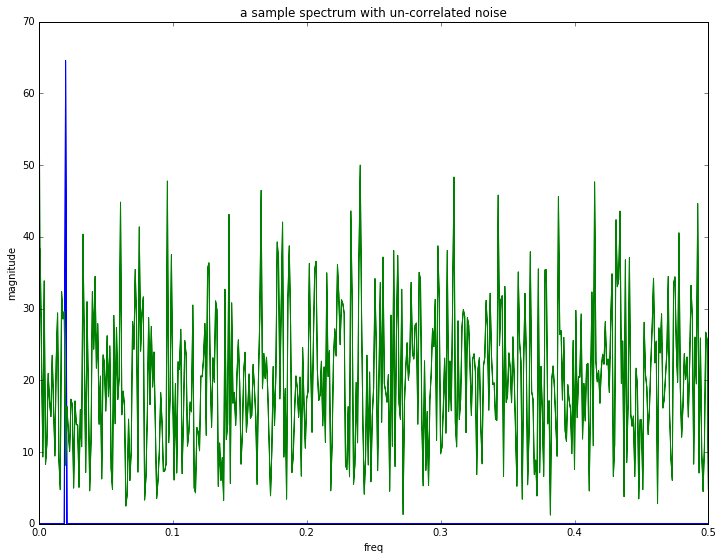

In [9]:
plt.ylabel('magnitude')
plt.xlabel('freq')
plt.title('a sample spectrum with un-correlated noise')
frequencies = np.abs(np.fft.fftfreq(steps))
data = sign(np.cos(np.pi * (base_frequency + np.random.randn(steps)) ** 2.0 * np.arange(0, steps)))
magnitude = np.abs(np.fft.fft(data))

data = sign(np.cos(np.pi * (base_frequency) ** 2.0 * np.arange(0, steps)))
magnitude2 = (np.abs(np.fft.fft(data)) / np.max(np.abs(np.fft.fft(data)))) * np.max(magnitude)
plt.plot(frequencies, magnitude2)
plt.plot(frequencies, magnitude)
plt.show()

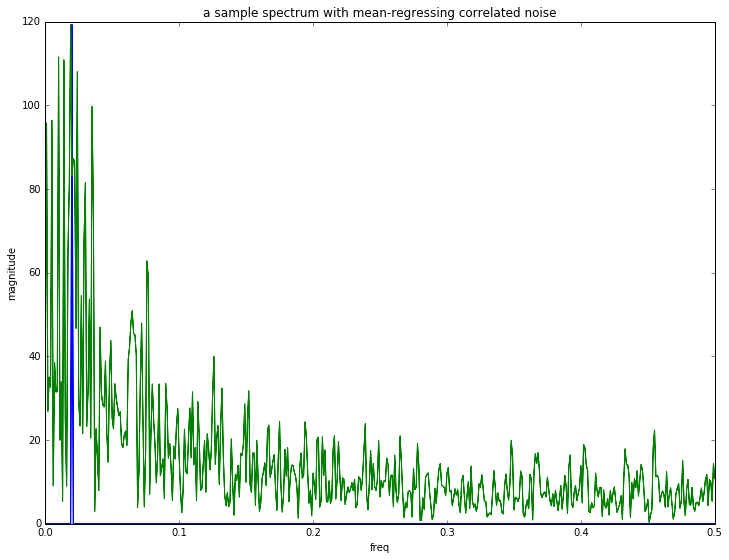

In [11]:
plt.ylabel('magnitude')
plt.xlabel('freq')
plt.title('a sample spectrum with mean-regressing correlated noise')
frequencies = np.abs(np.fft.fftfreq(steps))

noise = [base_frequency]
for t in range(steps - 1):
    theta = 0.01
    noise.append(noise[-1] + -theta * (noise[-1] - base_frequency) + sigma * np.random.randn())
noise = np.array(noise)

data = sign(np.cos(np.pi * (noise) ** 2.0 * np.arange(0, steps)))
magnitude = np.abs(np.fft.fft(data))
data = sign(np.cos(np.pi * (base_frequency) ** 2.0 * np.arange(0, steps)))
magnitude2 = (np.abs(np.fft.fft(data)) / np.max(np.abs(np.fft.fft(data)))) * np.max(magnitude)
plt.plot(frequencies, magnitude2)
plt.plot(frequencies, magnitude)
plt.show()